In [4]:
import numpy as np
seed_ = 20200218
np.random.seed(seed_)

import pandas as pd
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

sns.set_style('whitegrid')
color_palette = sns.color_palette("muted")
sns.set_palette(color_palette)

from sklearn.model_selection import train_test_split

from keras.models import Sequential
from keras.layers import Dense, Conv2D, Flatten

In [5]:
df = pd.read_csv("./data/train.csv")

In [9]:
X = df.iloc[:, 1:]
X.head()

,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [11]:
y = df['label']
y.head()

0    1
1    0
2    1
3    4
4    0
Name: label, dtype: int64

In [14]:
X.values.shape

(42000, 784)

In [65]:
X_ = X.values.reshape(X.values.shape[0], -1, 28, 28)

# normalization

X_ = X_/255

In [78]:
onehot_y  = pd.get_dummies(y).values

In [79]:
X_train, X_test, y_train, y_test = train_test_split(X_, onehot_y, test_size=0.3, random_state=seed_)

In [80]:
X_train.shape, X_test.shape

((29400, 1, 28, 28), (12600, 1, 28, 28))

In [81]:
y_train.shape, y_test.shape

((29400, 10), (12600, 10))

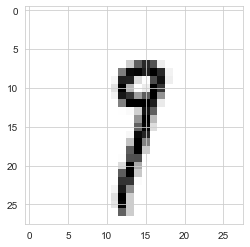

In [82]:
plt.imshow(X_train[0][0], cmap="Greys")

# 
## model

[keras conv2d](https://keras.io/api/layers/convolution_layers/convolution2d/)

In [83]:
model = Sequential()

model.add(Conv2D(28, kernel_size=(5, 5), activation='relu', padding='same'))
model.add(Conv2D(28, kernel_size=(5, 5), activation='relu', padding='same'))

model.add(Flatten())

# output layer
model.add(Dense(10, activation='softmax'))
model.compile(optimizer = 'adam' , loss = "categorical_crossentropy", metrics=["accuracy"])
model.fit(X_train, y_train)

Epoch 1/1
29400/29400 [==============================] - 8s 283us/step - loss: 0.3874 - accuracy: 0.8861


In [85]:
model.summary()

Model: "sequential_15"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_24 (Conv2D)           (None, 1, 28, 28)         19628     
_________________________________________________________________
conv2d_25 (Conv2D)           (None, 1, 28, 28)         19628     
_________________________________________________________________
flatten_11 (Flatten)         (None, 784)               0         
_________________________________________________________________
dense_10 (Dense)             (None, 10)                7850      
Total params: 47,106
Trainable params: 47,106
Non-trainable params: 0
_________________________________________________________________


In [ ]:
model.p